In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trades = pd.read_excel("Data/historical_data.xlsx")
sentiment = pd.read_excel("Data/fear_greed_index.xlsx")

In [3]:
trades.head()
trades.info()

sentiment.head()
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  int64  
 15  Timestamp         211224 non-null  int64  
dtypes: bool(1), float64(

In [4]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'])
trades['date'] = trades['Timestamp IST'].dt.date

sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [5]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)

In [6]:
merged.head()
merged['classification'].value_counts()

classification
Greed            48492
Fear             47315
Extreme Greed    34393
Neutral          32246
Extreme Fear      5411
Name: count, dtype: int64

In [7]:
merged['classification'].isna().mean()

np.float64(0.2053128432375109)

In [8]:
analysis_df = merged.dropna(subset=['classification'])

In [9]:
analysis_df.shape
analysis_df['classification'].value_counts()

classification
Greed            48492
Fear             47315
Extreme Greed    34393
Neutral          32246
Extreme Fear      5411
Name: count, dtype: int64

In [10]:
analysis_df['is_profit'] = analysis_df['Closed PnL'] > 0

C:\Users\hp\AppData\Local\Temp\ipykernel_2476\1941532558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['is_profit'] = analysis_df['Closed PnL'] > 0


In [11]:
analysis_df.groupby('classification')['Closed PnL'].mean()

classification
Extreme Fear     47.446302
Extreme Greed    73.144030
Fear             56.544720
Greed            35.652184
Neutral          31.746470
Name: Closed PnL, dtype: float64

In [12]:
analysis_df.groupby('classification')['is_profit'].mean()

classification
Extreme Fear     0.390501
Extreme Greed    0.458727
Fear             0.387890
Greed            0.403077
Neutral          0.402593
Name: is_profit, dtype: float64

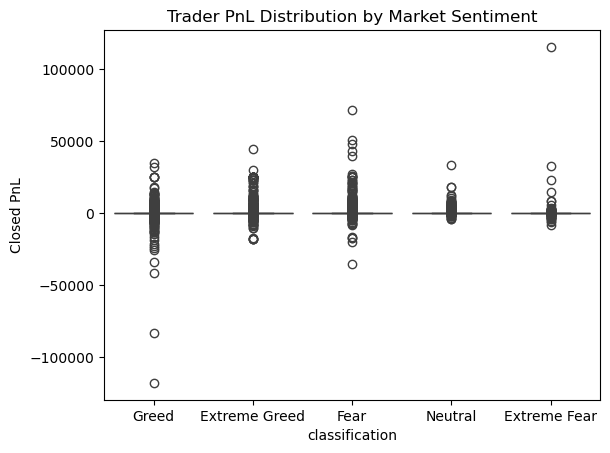

In [13]:
sns.boxplot(
    data=analysis_df,
    x='classification',
    y='Closed PnL'
)
plt.title("Trader PnL Distribution by Market Sentiment")
plt.show()

In [14]:
analysis_df.groupby('classification')['Size USD'].mean()

classification
Extreme Fear     3816.440098
Extreme Greed    3265.794510
Fear             7153.414717
Greed            5848.453393
Neutral          4641.500274
Name: Size USD, dtype: float64

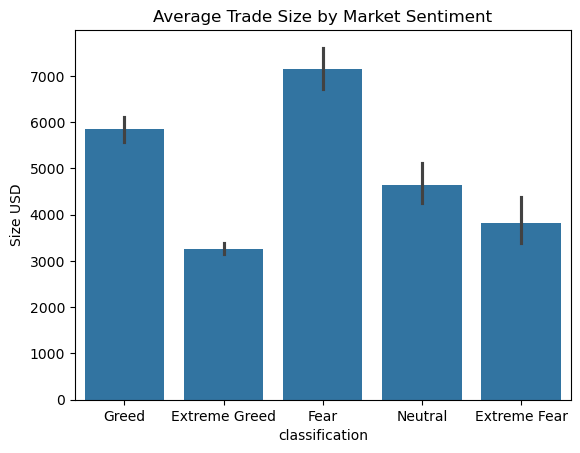

In [15]:
sns.barplot(
    data=analysis_df,
    x='classification',
    y='Size USD'
)
plt.title("Average Trade Size by Market Sentiment")
plt.show()